In [1]:
import numpy as np

def bandit(action,true_values):
    """指定されたアクションに対して報酬を返す"""
    # 平均: true_values[action], 標準偏差: 1
    return np.random.normal(true_values[action],1)

In [12]:
def epsilon_greedy_bandit(k,epsilon,steps,true_values):
    Q = np.zeros(k)
    N = np.zeros(k)
    rewards = []

    for _ in range(steps):
        if np.random.rand() < epsilon:
            action = np.random.randint(k)
        else:
            action = np.argmax(Q)

        reward = bandit(action,true_values)

        N[action] += 1
        Q[action] += (1/N[action]) * (reward - Q[action])

        rewards.append(reward)

    return Q, rewards


In [13]:
k = 10
epsilon = 0.1
steps = 1000
true_values = np.random.normal(0,1,k)

Q,rewards = epsilon_greedy_bandit(k,epsilon,steps,true_values)

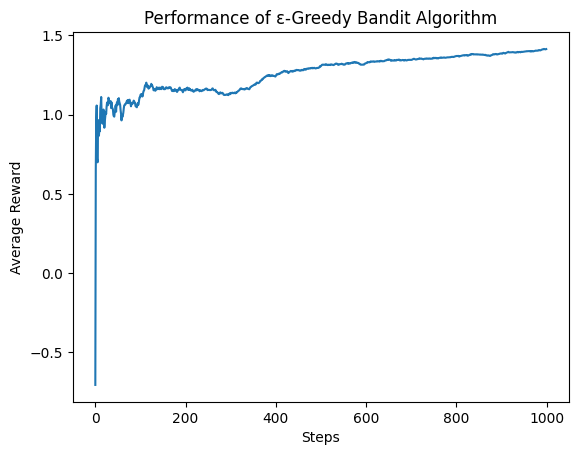

In [14]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(rewards)/np.arange(1,steps+1))
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Performance of ε-Greedy Bandit Algorithm")
plt.show()